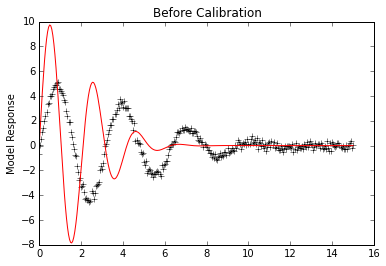

In [14]:
%matplotlib inline
# Calibration example modified from lmfit webpage
# (http://cars9.uchicago.edu/software/python/lmfit/parameters.html)
# This example demonstrates how to calibrate with an external code 
# The idea is to replace `python sine.py` in run_extern with any
# terminal command to run your model.
import sys,os
import numpy as np
from matplotlib import pyplot as plt
from multiprocessing import freeze_support
from subprocess import Popen,PIPE,call
from matk import matk, pest_io
import cPickle as pickle

def run_extern(params):
    # Create model input file
    pest_io.tpl_write(params,'../sine.tpl','sine.py')
    # Run model
    ierr = call('python sine.py', shell=True)
    # Collect model results
    out = pickle.load(open('sine.pkl','rb'))
    return out

# create data to be fitted
x = np.linspace(0, 15, 301)
np.random.seed(1000)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# Create MATK object
p = matk(model=run_extern)

# Create parameters
p.add_par('amp', value=10, min=0.)
p.add_par('decay', value=0.1)
p.add_par('shift', value=0.0, min=-np.pi/2., max=np.pi/2.)
p.add_par('omega', value=3.0)

# Create observation names and set observation values
for i in range(len(data)):
    p.add_obs('obs'+str(i+1), value=data[i])

# Look at initial fit
init_vals = p.forward(workdir='initial',reuse_dirs=True)
#f, (ax1,ax2) = plt.subplots(2,sharex=True)
plt.plot(x,data, 'k+')
plt.plot(x,p.simvalues, 'r')
plt.ylabel("Model Response")
plt.title("Before Calibration")
plt.show()

In [15]:
# Calibrate parameters to data, results are printed to screen
m = p.lmfit(cpus=2,workdir='calib')

[[Variables]]
     amp:       5.011398 +/- 0.040472 (0.81%) initial =  10.000000
     decay:     0.024835 +/- 0.000465 (1.87%) initial =  0.100000
     omega:     1.999116 +/- 0.003345 (0.17%) initial =  3.000000
     shift:    -0.106207 +/- 0.016466 (15.50%) initial =  0.000000
[[Correlations]] (unreported correlations are <  0.100)
    C(omega, shift)              = -0.785 
    C(amp, decay)                =  0.584 
    C(amp, shift)                = -0.117 
None
SSR:  12.8161380426


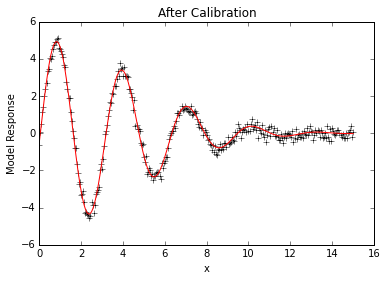

In [16]:
# Look at calibrated fit
plt.plot(x,data, 'k+')
plt.plot(x,p.simvalues, 'r')
plt.ylabel("Model Response")
plt.xlabel("x")
plt.title("After Calibration")
plt.show()